<a href="https://colab.research.google.com/github/codelalala/MLFS/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=datasets.load_diabetes()

In [5]:
data['data'].shape

(442, 10)

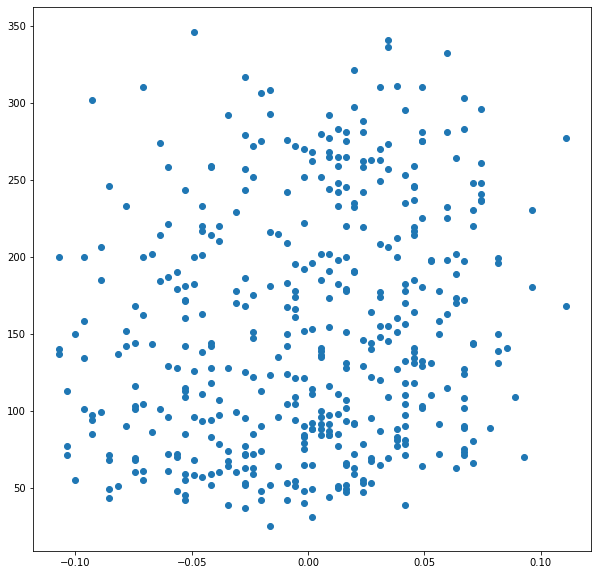

In [6]:
x=data['data'][:,0]
y=data['target']
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(x,y)

In [7]:
#first try with simple linear regression
x_bar=np.mean(x)
y_bar=np.mean(y)
beta=np.sum((x-x_bar)*(y-y_bar))/(np.sum((x-x_bar)**2))
alpha=y_bar-beta*x_bar


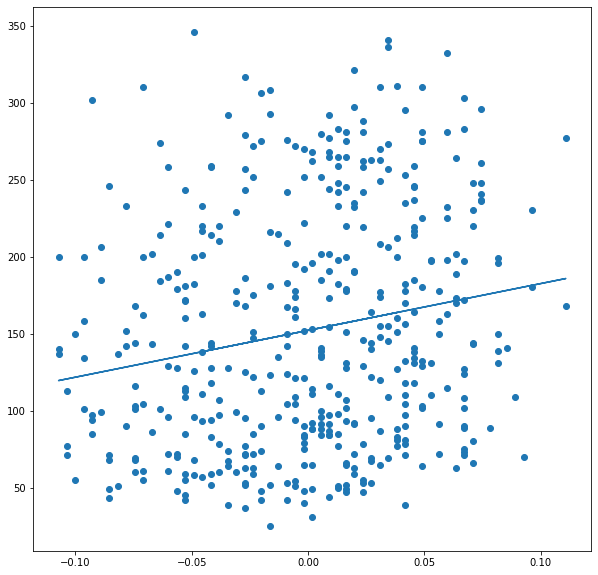

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(x,y)
ax.plot(x,beta*x+alpha)

In [9]:
xy_bar=np.mean(x*y)
x_part=np.mean(x**2)-x_bar**2
y_part=np.mean(y**2)-y_bar**2
r_xy=(xy_bar-x_bar*y_bar)/(np.sqrt(x_part*y_part))
print(r_xy)

0.1878887507189199


In [10]:
#now switch gear to gradient decent
def loss(k,b):
    return np.mean((y-k*x-b)**2)

def deri_k(k,b):
    return -2*np.mean(y-(k*x+b))

def deri_b(k,b):
    return -2*np.mean(y-(k*x+b))

In [11]:
#initial condition
k=0
b=0
l=0.001
num_step=1000
step=0
while step<num_step:
    L=loss(k,b)
    new_k=k-l*deri_k(k,b)
    new_b=b-l*deri_b(k,b)
    # print(L,k,b,new_k,new_b)
    k,b=new_k,new_b

    step+=1



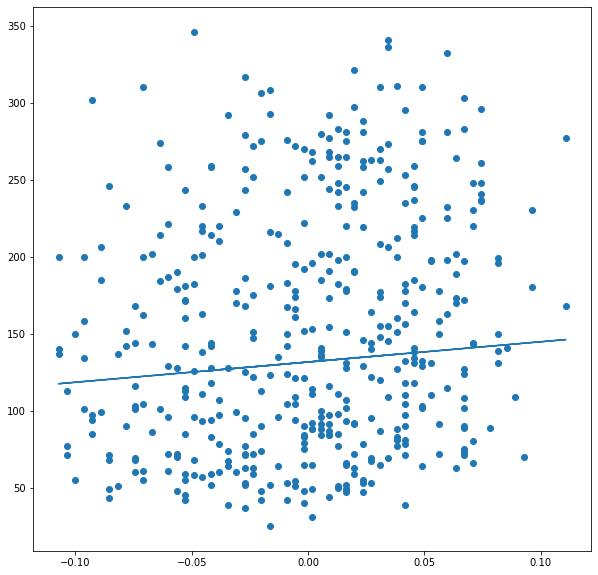

In [12]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(x,y)
ax.plot(x,k*x+b)

In [49]:
#multivariate linear regression
#10 features
x=data['data']
y=data['target'].reshape((len(x),1))
ones=np.ones((x.shape[0],1))
x=np.concatenate([x,ones],axis=1)#add one new x feature to simulate b
def loss_func(k):
    return np.mean((x.dot(k)-y)**2,axis=0)


def gradient_func(k):
    y_hat=x.dot(k)
    return np.mean(x.T.dot(y_hat-y),axis=1)

In [62]:
steps=0
limit=1000
lr=0.0001
k=np.zeros((11,1))
while steps<limit:

    gradient=gradient_func(k).reshape(k.shape)
    k-=lr*gradient
    loss=loss_func(k)
    print(loss)
    # print(gradient)
    steps+=1

[27071.98582181]
[25242.44993719]
[23570.92257377]
[22043.74457637]
[20648.43757393]
[19373.60190511]
[18208.82336768]
[17144.58802921]
[16172.20440204]
[15283.73234586]
[14471.91811654]
[13730.13502961]
[13052.32925331]
[12432.97028748]
[11867.00572351]
[11349.81991503]
[10877.19622141]
[10445.2825152]
[10050.55967123]
[9689.81277983]
[9360.10484849]
[9058.75277691]
[8783.30540897]
[8531.52348202]
[8301.3613094]
[8090.95004654]
[7898.58240361]
[7722.69867969]
[7561.87400424]
[7414.80668151]
[7280.30754252]
[7157.29021757]
[7044.76224955]
[6941.81697559]
[6847.62611045]
[6761.43297103]
[6682.54628668]
[6610.33454448]
[6544.22082343]
[6483.67807517]
[6428.22481266]
[6377.4211716]
[6330.86531227]
[6288.19013245]
[6249.06026449]
[6213.16933197]
[6180.23744353]
[6150.0089033]
[6122.25011931]
[6096.74769271]
[6073.30667209]
[6051.74895882]
[6031.91185018]
[6013.64670839]
[5996.81774483]
[5981.30090919]
[5966.98287482]
[5953.76011163]
[5941.53803928]
[5930.23025347]
[5919.75781913]
[5910.048

In [63]:
k

array([[ 23.83382263],
       [  1.9348397 ],
       [ 83.23663237],
       [ 61.53309403],
       [ 25.22490042],
       [ 19.12452369],
       [-53.96244052],
       [ 56.43887141],
       [ 78.56033889],
       [ 51.09063617],
       [152.13348416]])

In [95]:
#with pytorch framework
import torch
import random
w=torch.zeros((10,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
data_x=torch.tensor(data['data'],dtype=torch.float32)
data_y=torch.tensor(data['target'],dtype=torch.float32)

def data_iter(batch_size,x,y):
   
    indicies=list(range(len(x)))
    random.shuffle(indicies)
    indicies=indicies[:batch_size]
    yield x[indicies],y[indicies]

def linear(X,w,b):
    return torch.matmul(X,w)+b

def lse(y_hat,y):
    return (y_hat-y)**2

def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()


In [98]:
lr=0.01
num_epochs=1000
net=linear
batch_size=100
loss=lse
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,data_x,data_y):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    

In [100]:
w,b,l.sum()

(tensor([[  13.3860],
         [  50.0371],
         [-104.4401],
         [-119.2385],
         [   4.2601],
         [-186.4192],
         [ 227.6150],
         [ -33.9130],
         [ 129.2229],
         [ -84.9586]], requires_grad=True),
 tensor([2337.7239], requires_grad=True),
 tensor(4.7034e+10, grad_fn=<SumBackward0>))